<a href="https://colab.research.google.com/github/pb-roshith/Video-Game-Sales-Analysis-EDA/blob/main/Video_Game_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/vgchartz-2024.csv')

In [3]:
df.shape

(64016, 14)

In [4]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [5]:
df.drop(columns=['img'], inplace=True)

In [6]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [7]:
df.isna().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,57338
total_sales,45094
na_sales,51379
jp_sales,57290
pal_sales,51192


In [8]:
df.tail()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24
64015,Yurukill: The Calumniation Games,PS4,Visual Novel,Unknown,G.rev Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-29


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


In [10]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [11]:
num_cols

['critic_score',
 'total_sales',
 'na_sales',
 'jp_sales',
 'pal_sales',
 'other_sales']

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [14]:
df.isna().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,0
total_sales,0
na_sales,0
jp_sales,0
pal_sales,0


In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  64016 non-null  float64       
 6   total_sales   64016 non-null  float64       
 7   na_sales      64016 non-null  float64       
 8   jp_sales      64016 non-null  float64       
 9   pal_sales     64016 non-null  float64       
 10  other_sales   64016 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
 12  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 6.3+ MB


In [17]:
df['release_date'].fillna(df['release_date'].median(), inplace=True)
df['last_update'].fillna(df['last_update'].median(), inplace=True)

In [18]:
df.isna().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,0
total_sales,0
na_sales,0
jp_sales,0
pal_sales,0


In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,0
critic_score,0
total_sales,0
na_sales,0
jp_sales,0
pal_sales,0


In [21]:
df.shape

(63999, 13)

**Which titles sold the most worldwide?**

In [22]:
top10 = df.groupby('title')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(10)

In [23]:
top10

,title,total_sales
13719,Grand Theft Auto V,65.686451
5264,Call of Duty: Black Ops,32.037338
5279,Call of Duty: Modern Warfare 3,31.059113
5271,Call of Duty: Black Ops II,29.939113
5275,Call of Duty: Ghosts,29.149113
5269,Call of Duty: Black Ops 3,26.720000
20993,Minecraft,26.104676
5278,Call of Duty: Modern Warfare 2,26.067338
13714,Grand Theft Auto IV,23.228225
5263,Call of Duty: Advanced Warfare,21.780000


In [24]:
px.bar(top10, x='title', y='total_sales', title='Top 10')

**Which year had the highest sales? Has the industry grown over time?**

In [25]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

In [26]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-04-21,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-04-21,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-04-21,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015


In [27]:
top10_sales_by_year = df.groupby('release_year')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(10)

In [28]:
top10_sales_by_year

,release_year,total_sales
34,2008,3429.537130
35,2009,1405.496739
36,2010,1223.813444
37,2011,1185.326444
40,2014,1083.199317
33,2007,875.224630
39,2013,694.012137
28,2002,620.322702
29,2003,616.138744
32,2006,610.290081


In [29]:
px.bar(top10_sales_by_year, x='release_year', y='total_sales', title='top sales by year')

In [30]:
px.line(df.groupby('release_year')['total_sales'].sum().reset_index(), x='release_year', y='total_sales', title='top sales by year')

**Do any consoles seem to specialize in a particular genre?**

In [31]:
top10_console = df.groupby(['console', 'genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(10)

In [32]:
top10_console

,console,genre,total_sales
456,PC,Adventure,579.434784
472,PC,Strategy,491.942109
461,PC,Misc,466.622278
467,PC,Role-Playing,421.048926
454,PC,Action,406.433771
469,PC,Shooter,378.441307
470,PC,Simulation,324.952561
526,PS2,Sports,320.841577
788,X360,Shooter,251.598535
116,And,Misc,238.094843


In [33]:
px.sunburst(top10_console, path=['console', 'genre'], values='total_sales', title='top 10 console by genre')

**What titles are popular in one region but flop in another?**

In [34]:
df['na_ratio'] = df['na_sales'] / df['total_sales']
df['jp_ratio'] = df['jp_sales'] / df['total_sales']
df['pal_ratio'] = df['pal_sales'] / df['total_sales']

In [35]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-04-21,2013,0.313484,0.048720,0.484744
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,0.312532,0.030944,0.500774
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-04-21,2002,0.520743,0.029102,0.339938
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-04-21,2013,0.571248,0.003783,0.336066
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015,0.409543,0.027170,0.400928


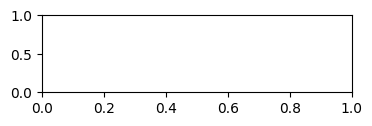

In [43]:
na_popular = df[ (df.na_ratio>0.8) & (df.jp_ratio<0.2) & (df.pal_ratio<0.2) ].head(10)

In [44]:
na_popular

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
75,Madden NFL 2004,PS2,Sports,EA Sports,EA Tiburon,9.50000,5.23,4.26,0.010000,0.26,0.71,2003-08-12,2019-04-21,2003,0.814532,0.001912,0.049713
94,Madden NFL 06,PS2,Sports,EA Sports,EA Tiburon,9.10000,4.91,3.98,0.010000,0.26,0.66,2005-08-08,2019-04-21,2005,0.810591,0.002037,0.052953
114,Madden NFL 2005,PS2,Sports,EA Sports,EA Tiburon,9.50000,4.53,4.18,0.010000,0.26,0.08,2004-08-09,2019-04-21,2004,0.922737,0.002208,0.057395
125,Asteroids,2600,Shooter,Atari,Atari,7.22044,4.31,4.00,0.102281,0.26,0.05,1981-01-01,2019-04-21,1981,0.928074,0.023731,0.060325
135,Teenage Mutant Ninja Turtles,NES,Platform,Ultra Games,Konami,5.90000,4.17,3.38,0.310000,0.44,0.04,1989-06-01,2019-04-21,1989,0.810552,0.074341,0.105516
136,Frogger,PS,Action,Hasbro Interactive,Millenium Interactive,7.22044,4.16,3.79,0.102281,0.27,0.11,1997-09-30,2019-04-21,1997,0.911058,0.024587,0.064904
139,Madden NFL 2003,PS2,Sports,EA Sports,EA Tiburon,9.40000,4.14,3.36,0.010000,0.21,0.56,2002-08-12,2019-04-21,2002,0.811594,0.002415,0.050725
193,Assassin's Creed: Brotherhood,X360,Action,Ubisoft,Ubisoft Montreal,9.10000,3.53,2.87,0.030000,0.39,0.25,2010-11-16,2019-04-21,2010,0.813031,0.008499,0.110482
247,NBA 2K13,X360,Sports,2K Sports,Visual Concepts,8.60000,3.11,2.62,0.010000,0.21,0.28,2012-10-02,2018-01-04,2012,0.842444,0.003215,0.067524
250,Madden NFL 2002,PS2,Sports,EA Sports,EA Sports,7.22044,3.08,2.50,0.010000,0.16,0.42,2001-08-19,2019-04-21,2001,0.811688,0.003247,0.051948


In [49]:
px.bar(na_popular, x='title', y=['na_sales', 'jp_sales', 'pal_sales'], title='10 most popular titles in na but flop in jp and pla')

In [50]:
jp_popular = df[ (df.jp_ratio>0.8) & (df.na_ratio<0.2) & (df.pal_ratio<0.2) ].head(10)

In [51]:
jp_popular

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
349,Hot Shots Golf,PS,Sports,Sony Computer Entertainment,Camelot Software Planning,7.22044,2.56,0.26000,2.13,0.170000,0.043041,1998-05-05,2019-04-21,1998,0.101562,0.832031,0.066406
445,R.B.I. Baseball,NES,Sports,Tengen,Namco,7.22044,2.20,0.15000,2.05,0.149472,0.043041,1988-01-01,2019-04-21,1988,0.068182,0.931818,0.067942
499,Famista '89 - Kaimaku Han!!,NES,Sports,Namco,Namco,7.22044,2.05,0.26474,2.05,0.149472,0.043041,1989-07-28,2019-04-21,1989,0.129141,1.000000,0.072913
604,Dragon Quest XI,3DS,Role-Playing,Square Enix,Square Enix,7.22044,1.82,0.26474,1.82,0.149472,0.043041,2017-07-29,2018-01-05,2017,0.145462,1.000000,0.082128
667,Super Puyo Puyo,SNES,Puzzle,Banpresto,Compile,7.22044,1.70,0.26474,1.69,0.149472,0.010000,1993-12-10,2019-04-21,1993,0.155729,0.994118,0.087925
675,Tomodachi Collection: New Life,3DS,Simulation,Nintendo,Nintendo,7.22044,1.69,0.26474,1.69,0.149472,0.043041,2013-04-13,2018-01-06,2013,0.156651,1.000000,0.088445
799,Xevious,NES,Shooter,Namco,Namco,7.22044,1.52,0.18000,1.27,0.060000,0.010000,1990-01-01,2019-04-21,1990,0.118421,0.835526,0.039474
815,Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...,NES,Platform,Hudson Soft,Hudson Soft,7.22044,1.50,0.26474,1.50,0.149472,0.000000,1986-03-05,2019-04-21,1986,0.176493,1.000000,0.099648
869,Game de Hakken!! Tamagotchi 2,GB,Simulation,Bandai,Tom Create,7.22044,1.45,0.26474,1.44,0.149472,0.010000,1997-10-17,2019-04-21,1997,0.182579,0.993103,0.103084
872,Tamagotchi,GB,Simulation,Bandai,Tom Create,7.22044,1.45,0.26474,1.44,0.149472,0.010000,1997-06-26,2019-04-21,1997,0.182579,0.993103,0.103084


In [52]:
px.bar(jp_popular, x='title', y=['na_sales', 'jp_sales', 'pal_sales'], title='10 most popular titles in jp but flop in na and pla')

In [55]:
pal_popular = df[ (df.pal_ratio>0.8) & (df.na_ratio<0.2) & (df.jp_ratio<0.2) ].head(10)

In [56]:
pal_popular

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
34,The Sims 3,PC,Simulation,Electronic Arts,EA Redwood Shores,8.50000,7.96,1.01000,0.102281,6.46,0.500000,2009-06-02,2019-04-21,2009,0.126884,0.012849,0.811558
280,Colin McRae Rally,PS,Racing,Sony Computer Entertainment,Codemasters,7.90000,2.87,0.09000,0.120000,2.43,0.220000,2000-01-31,2019-04-21,2000,0.031359,0.041812,0.846690
918,Anno 2070,PC,Strategy,Ubisoft,Blue Byte Studio,8.70000,1.40,0.26474,0.102281,1.14,0.260000,2011-11-17,2019-04-21,2011,0.189100,0.073058,0.814286
1007,TOCA 2 Touring Car Championship,PS,Racing,Codemasters,Codemasters,7.22044,1.32,0.03000,0.020000,1.16,0.110000,1999-10-31,2019-04-21,1999,0.022727,0.015152,0.878788
1077,Brian Lara Cricket,PS,Sports,Codemasters,Codemasters,7.22044,1.26,0.02000,0.010000,1.13,0.100000,1998-12-01,2019-04-21,1998,0.015873,0.007937,0.896825
1213,Spore,PC,Strategy,Electronic Arts,Maxis,7.00000,1.16,0.03000,0.102281,1.06,0.070000,2008-09-07,2019-04-21,2008,0.025862,0.088173,0.913793
1347,Pro Evolution Soccer 2008,X360,Sports,Konami,Konami,7.22044,1.07,0.08000,0.040000,0.90,0.050000,2008-03-12,2019-04-21,2008,0.074766,0.037383,0.841121
1483,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,Sports,Konami,Konami Computer Entertainment Tokyo,7.22044,1.00,0.08000,0.020000,0.90,0.043041,2007-02-06,2019-04-21,2007,0.080000,0.020000,0.900000
1530,Fallout 3,PC,Role-Playing,Bethesda Softworks,Bethesda Game Studios,9.00000,0.98,0.02000,0.102281,0.88,0.070000,2008-10-28,2019-04-21,2008,0.020408,0.104368,0.897959
1543,Grand Theft Auto: San Andreas,PC,Action,Rockstar Games,Rockstar North,9.40000,0.97,0.00000,0.102281,0.93,0.040000,2005-06-07,2019-04-21,2005,0.000000,0.105444,0.958763


In [57]:
px.bar(pal_popular, x='title', y=['na_sales', 'jp_sales', 'pal_sales'], title='10 most popular titles in pal but flop in na and jp')